<a href="https://colab.research.google.com/github/MinYeongPark/AI_practice/blob/main/221017%EC%8B%A4%EC%8A%B5_5_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_MNIST_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader

### MNIST 실습 및 과적합 확인하기

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')
mnist_data = mnist.data

In [4]:
mnist_data
# 28 * 28 = 784 짜리의 이미지를 일렬로 쭉 늘려놓은 것. 

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


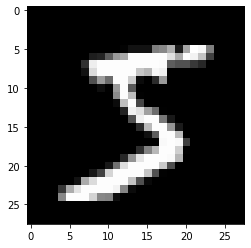

In [5]:
mnist_ex = np.array(mnist_data.iloc[0]).reshape(28,28) # array형태로 바꿔주고, 0번째 이미지만 뽑아오겠다. (첫번째 이미지만 보겠다) 정사각형 형태로 다시 바꿔줌.
plt.imshow(mnist_ex, cmap=cm.gray) # 이미지를 보여주는 함수. 
# 5인 것 같음

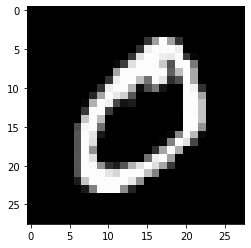

In [6]:
mnist_ex = np.array(mnist_data.iloc[1]).reshape(28,28) # array형태로 바꿔주고, 0번째 이미지만 뽑아오겠다. (첫번째 이미지만 보겠다) 정사각형 형태로 다시 바꿔줌.
plt.imshow(mnist_ex, cmap=cm.gray) # 이미지를 보여주는 함수. cmap은 흑백으로 바꿔주는 것.
# 0인 것 같음

In [7]:
# pytorch로 넘어와서 다시 다운로드

from torchvision import datasets 
from torchvision import transforms

download_root = './MNIST'
train_dataset = datasets.MNIST(root=download_root, 
                               train=True,
                               transform=transforms.ToTensor(), # 나온 이미지를 텐서로 바꿈.
                               download=True)

valid_dataset = datasets.MNIST(root=download_root, 
                               train=False,
                               transform=transforms.ToTensor(),
                               download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



In [8]:
batch_size = 512
train_loader = DataLoader(train_dataset,
                          batch_size=batch_size) # 이미 섞여 있음

valid_loader = DataLoader(valid_dataset,
                          batch_size=batch_size) # valid는 섞으면 안 됨.

In [9]:
torch.manual_seed(1017)

class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(28*28, 256), # 은닉층. 처음에 754개, 256개, 128개, 10개...
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128,10), # 마지막 출력층 노드를 10개로 만듦
            nn.Softmax() # 출력층 노드들의 합을 1로 만들어줌(확률로 만들어줌)
        )

    def forward(self, x):
        pred = self.network(x)
        return pred

In [10]:
model = model()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
criterion = nn.CrossEntropyLoss()
num_epochs = 2000

In [12]:
torch.manual_seed(1017)

# 학습과정
for epoch in range(num_epochs): # epoch를 설정
    model.train() # 학습 모드
    total_train_loss = 0 # 사용할 변수를 미리 할당
    total_train_acc = 0 # 사용할 변수를 미리 할당
    for img, labels in train_loader: # 한번 돌아가면(이미지를 꺼내면) 512장씩 꺼내겠다  # dataloader는 image와 label로 구성
        img = img.reshape(-1, 784) # 데이터를 (장 수, 데이터의 길이)의 shape로 변환

        pred = model(img)
        loss = criterion(pred, labels)

        total_train_loss += loss.item() # epoch 하나 당 loss를 계산하기 위해서 batch 별로 loss를 누적

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_acc += (torch.argmax(pred, dim=1) == labels).sum() / img.size(0) # 정확도
                        # 확률이 가장 높은 걸 행마다 불러온다
                        # 맞은 개수를 장 수(img.size(0))로 나눠주면 확률이 나옴.

    model.eval() # 평가 모드 : 역전파가 이루어지지 않아요
    total_valid_loss = 0
    total_valid_acc = 0

    with torch.no_grad(): # 미분을 진행하지 않겠다(누적되는 기울기 자체가 없다)
        for img, labels in valid_loader:
            img = img.reshape(-1, 784)
            pred = model(img)

            loss = criterion(pred, labels)
            total_valid_loss += loss.item()
            total_valid_acc += (torch.argmax(pred, dim=1) == labels).sum() / img.size(0)

    train_loss = total_train_loss / len(train_loader) # loader의 길이 = 전체 데이터 수 / batch_size 
                                                    # train_loader는 batch의 총 개수.
    valid_loss = total_valid_loss / len(valid_loader)
    train_acc = total_train_acc / len(train_loader)
    valid_acc = total_valid_acc / len(train_loader)

    print('*** Epoch: {}/{}, Train Loss & Accuracy: ({:.3f}, {:.3f}), Valid Loss & Accuracy: ({:.3f}, {:.3f})'.format(epoch+1, num_epochs, train_loss, train_acc, valid_loss, valid_acc))

# 학습데이터에 대해서는 너무 잘 맞는데, 테스트 데이터에 대해서는 상대적으로 잘 못 맞춤.

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


*** Epoch: 1/2000, Train Loss & Accuracy: (1.751, 0.770), Valid Loss & Accuracy: (1.572, 0.153)
*** Epoch: 2/2000, Train Loss & Accuracy: (1.558, 0.913), Valid Loss & Accuracy: (1.543, 0.157)
*** Epoch: 3/2000, Train Loss & Accuracy: (1.538, 0.930), Valid Loss & Accuracy: (1.531, 0.158)
*** Epoch: 4/2000, Train Loss & Accuracy: (1.526, 0.940), Valid Loss & Accuracy: (1.523, 0.160)
*** Epoch: 5/2000, Train Loss & Accuracy: (1.517, 0.948), Valid Loss & Accuracy: (1.517, 0.161)
*** Epoch: 6/2000, Train Loss & Accuracy: (1.511, 0.954), Valid Loss & Accuracy: (1.513, 0.161)
*** Epoch: 7/2000, Train Loss & Accuracy: (1.506, 0.959), Valid Loss & Accuracy: (1.512, 0.161)
*** Epoch: 8/2000, Train Loss & Accuracy: (1.502, 0.962), Valid Loss & Accuracy: (1.507, 0.162)
*** Epoch: 9/2000, Train Loss & Accuracy: (1.498, 0.966), Valid Loss & Accuracy: (1.504, 0.163)
*** Epoch: 10/2000, Train Loss & Accuracy: (1.495, 0.968), Valid Loss & Accuracy: (1.502, 0.163)
*** Epoch: 11/2000, Train Loss & Accura

KeyboardInterrupt: ignored

### 드랍아웃을 적용하여 과적합 방지해보기 : epoch가 고정되어 있을 때

In [19]:
torch.manual_seed(1017)

class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128,10),
            nn.Softmax()
        )
    
    def forward(self, x):
        pred = self.network(x)
        
        return pred

In [20]:
model = model()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
torch.manual_seed(1017)

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    total_train_acc = 0
    for img, labels in train_loader: # dataloader는 image와 label로 구성
        img = img.reshape(-1, 784)

        pred =  model(img)
#             print(torch.argmax(pred, dim=1))
        loss = criterion(pred, labels)

        total_train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_acc += (torch.argmax(pred, dim=1) == labels).sum() / img.size(0)

    model.eval()
    total_valid_loss = 0
    total_valid_acc = 0

    with torch.no_grad(): # 미분을 진행하지 않는다는 의미
        for img, labels in valid_loader: 
            img = img.reshape(-1, 784)
            pred =  model(img)

            loss = criterion(pred, labels)

            total_valid_loss += loss.item()
            total_valid_acc += (torch.argmax(pred, dim=1) == labels).sum() / img.size(0)

    train_loss = total_train_loss / len(train_loader)
    valid_loss = total_valid_loss / len(valid_loader)
    train_acc = total_train_acc / len(train_loader)
    valid_acc = total_valid_acc / len(valid_loader)

    print("***Epoch : {}/{}, Train Loss & Accuracy: ({:.3f}, {:.3f}), Valid Loss & Accuracy: ({:.3f}, {:.3f})".format(epoch+1, num_epochs,
                                                                                                                      train_loss, train_acc,
                                                                                                                      valid_loss, valid_acc))

***Epoch : 1/2000, Train Loss & Accuracy: (1.760, 0.758), Valid Loss & Accuracy: (1.572, 0.899)
***Epoch : 2/2000, Train Loss & Accuracy: (1.563, 0.908), Valid Loss & Accuracy: (1.542, 0.925)
***Epoch : 3/2000, Train Loss & Accuracy: (1.541, 0.927), Valid Loss & Accuracy: (1.528, 0.937)
***Epoch : 4/2000, Train Loss & Accuracy: (1.528, 0.938), Valid Loss & Accuracy: (1.520, 0.945)
***Epoch : 5/2000, Train Loss & Accuracy: (1.520, 0.946), Valid Loss & Accuracy: (1.512, 0.952)
***Epoch : 6/2000, Train Loss & Accuracy: (1.512, 0.954), Valid Loss & Accuracy: (1.508, 0.956)
***Epoch : 7/2000, Train Loss & Accuracy: (1.507, 0.958), Valid Loss & Accuracy: (1.503, 0.961)
***Epoch : 8/2000, Train Loss & Accuracy: (1.502, 0.962), Valid Loss & Accuracy: (1.499, 0.964)
***Epoch : 9/2000, Train Loss & Accuracy: (1.498, 0.967), Valid Loss & Accuracy: (1.498, 0.965)
***Epoch : 10/2000, Train Loss & Accuracy: (1.494, 0.970), Valid Loss & Accuracy: (1.494, 0.969)
***Epoch : 11/2000, Train Loss & Accura

KeyboardInterrupt: ignored

### 얼리스탑을 통해 과적합 방지하기 : epoch를 고정시키지 않았을 때
- 얼리스탑은 과적합을 판단하면 학습을 중시
- epoch를 얼만큼 주든 상관이 없음.

In [22]:
torch.manual_seed(1017)

class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128,10),
            nn.Softmax()
        )
    
    def forward(self, x):
        pred = self.network(x)
        
        return pred

In [23]:
model = model()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [24]:
torch.manual_seed(1017)

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    total_train_acc = 0
    for img, labels in train_loader: # dataloader는 image와 label로 구성
        img = img.reshape(-1, 784)

        pred =  model(img)
#             print(torch.argmax(pred, dim=1))
        loss = criterion(pred, labels)

        total_train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_acc += (torch.argmax(pred, dim=1) == labels).sum() / img.size(0)

    model.eval()
    total_valid_loss = 0
    total_valid_acc = 0

    with torch.no_grad(): # 미분을 진행하지 않는다는 의미
        for img, labels in valid_loader: 
            img = img.reshape(-1, 784)
            pred =  model(img)

            loss = criterion(pred, labels)

            total_valid_loss += loss.item()
            total_valid_acc += (torch.argmax(pred, dim=1) == labels).sum() / img.size(0)

    train_loss = total_train_loss / len(train_loader)
    valid_loss = total_valid_loss / len(valid_loader)
    train_acc = total_train_acc / len(train_loader)
    valid_acc = total_valid_acc / len(valid_loader)

    print("***Epoch : {}/{}, Train Loss & Accuracy: ({:.3f}, {:.3f}), Valid Loss & Accuracy: ({:.3f}, {:.3f})".format(epoch+1, num_epochs,
                                                                                                                      train_loss, train_acc,
                                                                                                                      valid_loss, valid_acc))

***Epoch : 1/2000, Train Loss & Accuracy: (1.760, 0.758), Valid Loss & Accuracy: (1.572, 0.899)
***Epoch : 2/2000, Train Loss & Accuracy: (1.563, 0.908), Valid Loss & Accuracy: (1.542, 0.925)
***Epoch : 3/2000, Train Loss & Accuracy: (1.541, 0.927), Valid Loss & Accuracy: (1.528, 0.937)
***Epoch : 4/2000, Train Loss & Accuracy: (1.528, 0.938), Valid Loss & Accuracy: (1.520, 0.945)
***Epoch : 5/2000, Train Loss & Accuracy: (1.520, 0.946), Valid Loss & Accuracy: (1.512, 0.952)
***Epoch : 6/2000, Train Loss & Accuracy: (1.512, 0.954), Valid Loss & Accuracy: (1.508, 0.956)
***Epoch : 7/2000, Train Loss & Accuracy: (1.507, 0.958), Valid Loss & Accuracy: (1.503, 0.961)
***Epoch : 8/2000, Train Loss & Accuracy: (1.502, 0.962), Valid Loss & Accuracy: (1.499, 0.964)
***Epoch : 9/2000, Train Loss & Accuracy: (1.498, 0.967), Valid Loss & Accuracy: (1.498, 0.965)
***Epoch : 10/2000, Train Loss & Accuracy: (1.494, 0.970), Valid Loss & Accuracy: (1.494, 0.969)
***Epoch : 11/2000, Train Loss & Accura

KeyboardInterrupt: ignored

### 과적합 방지 : Drop-out, epoch가 고정되었을 때

In [27]:
torch.manual_seed(1017)

class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(28*28, 256), # 은닉층. 처음에 754개, 256개, 128개, 10개...
            nn.ReLU(),
            nn.Dropout(0.2), # 20%만큼의 노드를 사용하지 않겠다 
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(128,10), # 마지막 출력층 노드를 10개로 만듦
            nn.Softmax() # 출력층 노드들의 합을 1로 만들어줌(확률로 만들어줌)
        )

    def forward(self, x):
        pred = self.network(x)
        return pred

In [28]:
model = model()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
torch.manual_seed(1017)

best = 100

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    total_train_acc = 0
    for img, labels in train_loader: # dataloader는 image와 label로 구성
        img = img.reshape(-1, 784)

        pred =  model(img)
#             print(torch.argmax(pred, dim=1))
        loss = criterion(pred, labels)

        total_train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_acc += (torch.argmax(pred, dim=1) == labels).sum() / img.size(0)

    model.eval()
    total_valid_loss = 0
    total_valid_acc = 0

    with torch.no_grad(): # 미분을 진행하지 않는다는 의미
        for img, labels in valid_loader: 
            img = img.reshape(-1, 784)
            pred =  model(img)

            loss = criterion(pred, labels)

            total_valid_loss += loss.item()
            total_valid_acc += (torch.argmax(pred, dim=1) == labels).sum() / img.size(0)

    train_loss = total_train_loss / len(train_loader)
    valid_loss = total_valid_loss / len(valid_loader)
    train_acc = total_train_acc / len(train_loader)
    valid_acc = total_valid_acc / len(valid_loader)

    print("***Epoch : {}/{}, Train Loss & Accuracy: ({:.3f}, {:.3f}), Valid Loss & Accuracy: ({:.3f}, {:.3f})".format(epoch+1, num_epochs,
                                                                                                                      train_loss, train_acc,
                                                                                                                      valid_loss, valid_acc))
    
    
        # Early Stopping
    if valid_loss < best:
        best = valid_loss
        best_epoch = epoch + 1
        print('Best Valid Loss {:.4f}'.format(best))
        converge_cnt = 0
    else:
        converge_cnt += 1
    
    if converge_cnt > 2: 
        print('Early stopping')
        print('Best Result : Epoch {}, Valid Loss {:.3f}'.format(best_epoch, best))
        break

***Epoch : 1/2000, Train Loss & Accuracy: (1.576, 0.896), Valid Loss & Accuracy: (1.544, 0.922)
Best Valid Loss 1.5438
***Epoch : 2/2000, Train Loss & Accuracy: (1.552, 0.916), Valid Loss & Accuracy: (1.532, 0.933)
Best Valid Loss 1.5318
***Epoch : 3/2000, Train Loss & Accuracy: (1.538, 0.929), Valid Loss & Accuracy: (1.522, 0.943)
Best Valid Loss 1.5222
***Epoch : 4/2000, Train Loss & Accuracy: (1.526, 0.940), Valid Loss & Accuracy: (1.514, 0.950)
Best Valid Loss 1.5135
***Epoch : 5/2000, Train Loss & Accuracy: (1.519, 0.947), Valid Loss & Accuracy: (1.509, 0.954)
Best Valid Loss 1.5090
***Epoch : 6/2000, Train Loss & Accuracy: (1.513, 0.953), Valid Loss & Accuracy: (1.504, 0.960)
Best Valid Loss 1.5041
***Epoch : 7/2000, Train Loss & Accuracy: (1.507, 0.957), Valid Loss & Accuracy: (1.501, 0.962)
Best Valid Loss 1.5006
***Epoch : 8/2000, Train Loss & Accuracy: (1.503, 0.962), Valid Loss & Accuracy: (1.498, 0.964)
Best Valid Loss 1.4982
***Epoch : 9/2000, Train Loss & Accuracy: (1.499

KeyboardInterrupt: ignored